In [1]:
import sys
sys.path.append('..')
import numpy as np
from dezero import Function

In [2]:
class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y
    
    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx

def sin(x):
    return Sin()(x)

In [3]:
from dezero import Variable

In [4]:
x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()


In [5]:
print(y.data)
print(x.grad)

0.7071067811865475
0.7071067811865476


In [6]:
import math

def my_sin(x, threshold=.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

In [7]:
x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()
print(y.data)
print(x.grad)

0.7071064695751781
0.7071032148228457


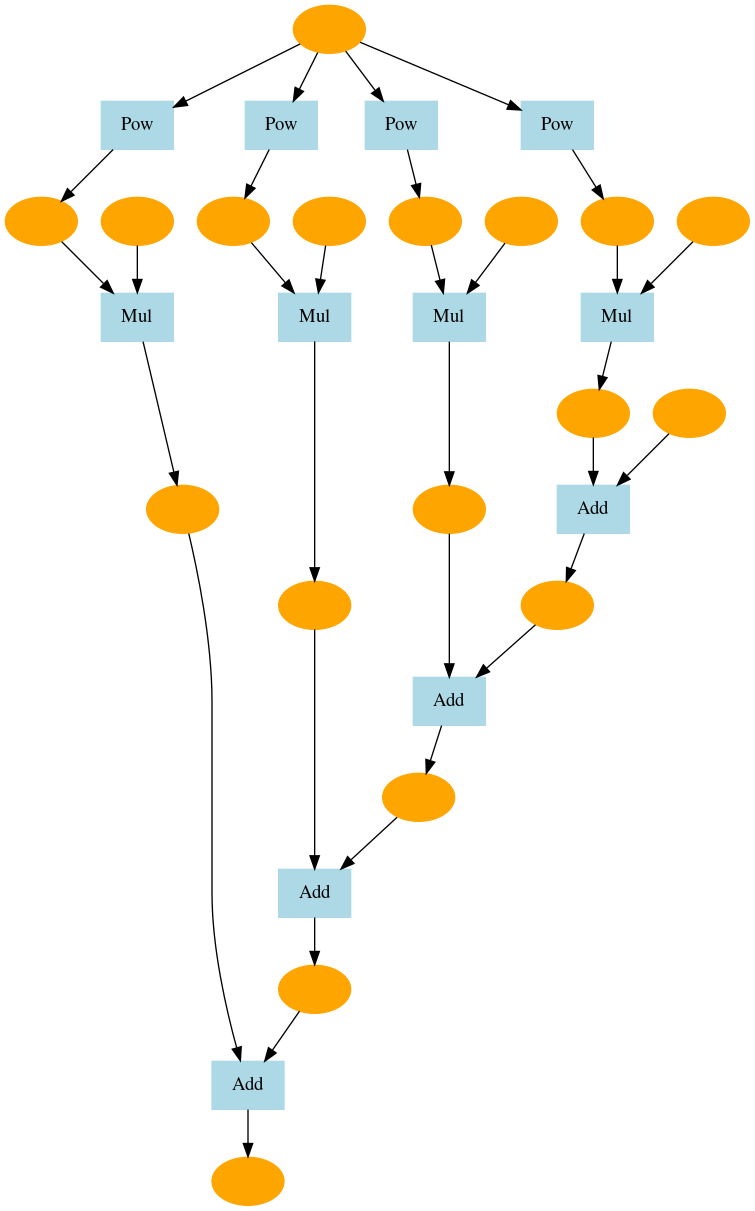

In [9]:
from dezero.utils import plot_dot_graph

plot_dot_graph(y, verbose=False, to_file='my_sin.png')